In [1]:
%pwd
%cd ..

/mnt/s/Keep working hard/projects/python/farich-pics


In [21]:
%load_ext autoreload
%autoreload 2

In [8]:
from farichlib import DataPreprocessing
from farichlib.DataPreprocessing import print_board
# from farichlib.utils import iou_score
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

%matplotlib inline

In [8]:
import uproot

In [3]:
rootFiles = [ 'data/farichSimRes_e-mu-_1000MeV_25-90deg_30.0k_2020-02-07.root', 
'data/farichSimRes_pi-kaon-_1000MeV_0-90deg_50.0k_2020-02-11.root']

In [126]:
dp = DataPreprocessing()
dp.process_root(*rootFiles)

In [127]:
X,y = dp.get_images()

In [14]:
len(X)

55508

In [103]:
index = 40000

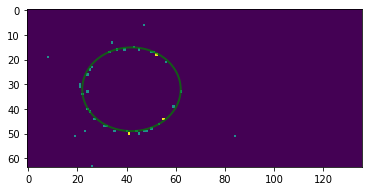

In [104]:
index += 1
ax = plt.gca()
plt.imshow( X[index].toarray() )

yy = y[index]
el = Ellipse((yy[1], yy[0]), yy[3], yy[2], yy[4],  linewidth=2, fill=False, edgecolor='green', alpha=0.7 )
ax.add_artist(el)

In [159]:
H_all, h_all, mask_all = dp.generate_boards_randnum(board_size=100, N_circles=3, N_boards=10)

0


In [160]:
h_all[5]

array([[40., 52., 34., 40.,  0.]])

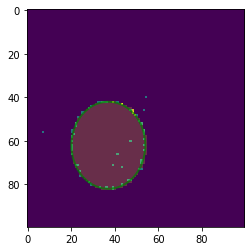

In [161]:
index = 3
ax = plt.gca()
plt.imshow( H_all[index].toarray().T )

for i, yy in enumerate( h_all[index] ):
    el = Ellipse((yy[0], yy[1]), yy[2], yy[3], yy[4],  linewidth=2, fill=False, edgecolor='green', alpha=0.7 )
    ax.add_artist(el)
    plt.imshow( mask_all[index][i].T, alpha=0.2 )

In [13]:
info_arrays = uproot.open(rootFile)["info_sim"].arrays()
raw_tree = uproot.open(rootFile)["raw_data"]

# xedges, yedges = A.__get_board_size(info_arrays)
# zerobin = np.digitize(0, xedges)

In [14]:
df = raw_tree.pandas.df( branches=["hits.pos_chip._*", "pos_primary._*", "dir_primary._*"])

In [15]:
df

hits.pos_chip._2  hits.pos_chip._1  hits.pos_chip._0  \
entry subentry                                                         
0     0                   201.05         98.127839            -57.44   
      1                   201.05        109.007839            -60.80   
      2                   201.05        125.807839            -57.44   
      3                   201.05        109.007839            -60.80   
      4                   201.05         50.287839            -33.12   
...                          ...               ...               ...   
29999 40                  201.05        115.727839             60.80   
      41                  201.05        122.447839             57.44   
      42                  201.05        133.327839             57.44   
      43                  201.05        136.687839             57.44   
      44                  201.05        133.327839             57.44   

                pos_primary._2  pos_primary._1  pos_primary._0  \
entry subentry                                                   
0     0                    0.0       -1.671634        0.873968   
      1                    0.0       -1.671634        0.873968   
      2                    0.0       -1.671634        0.873968   
      3                    0.0       -1.671634        0.873968   
      4                    0.0       -1.671634        0.873968   
...                        ...             ...             ...   
29999 40                   0.0        0.242553       -0.269977   
      41                   0.0        0.242553       -0.269977   
      42                   0.0        0.242553       -0.269977   
      43                   0.0        0.242553       -0.269977   
      44                   0.0        0.242553       -0.269977   

                dir_primary._2  dir_primary._1  dir_primary._0  
entry subentry                                                  
0     0               0.906308        0.422618    2.587791e-17  
      1               0.906308        0.422618    2.587791e-17  
      2               0.906308        0.422618    2.587791e-17  
      3               0.906308        0.422618    2.587791e-17  
      4               0.906308        0.422618    2.587791e-17  
...                        ...             ...             ...  
29999 40              0.906308        0.422618    2.587791e-17  
      41              0.906308        0.422618    2.587791e-17  
      42              0.906308        0.422618    2.587791e-17  
      43              0.906308        0.422618    2.587791e-17  
      44              0.906308        0.422618    2.587791e-17  

[1484656 rows x 9 columns]

In [34]:
xedges, yedges = A.get_board_size(info_arrays)
zerobin = np.digitize(0, xedges)

In [62]:
df["chipx"] = np.digitize(df["hits.pos_chip._0"], xedges)
df["chipy"] = np.digitize(df["hits.pos_chip._1"], yedges)
xmin, xmax = df['chipx'].value_counts()[:2].index
ymin, ymax = df['chipy'].value_counts()[:2].index

In [42]:
from matplotlib.patches import Ellipse

In [63]:
xc, yc = (xmax+xmin)/2, (ymax+ymin)/2
a, b = xmax-xmin, ymax-ymin

In [70]:
x = np.array([1, 2, 3])

In [73]:
np.broadcast_to(x, (12, 3))

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [64]:
print(xc, yc, a, b)

32.0 42.0 -34 40


In [44]:
el = Ellipse((xc, yc), a, b, 0)

In [26]:
x0, y0 = df['hits.pos_chip._0'].median(), df['hits.pos_chip._1'].median()


In [29]:
amin, amax = df['hits.pos_chip._0'][df['hits.pos_chip._0']<x0].median(), \
df['hits.pos_chip._0'][df['hits.pos_chip._0']>x0].median()

In [30]:
amin, amax

(-43.19999999999999, 46.56000000000002)

In [60]:
r, rr = df['chipy'].value_counts()[:2].index

In [61]:
r

22

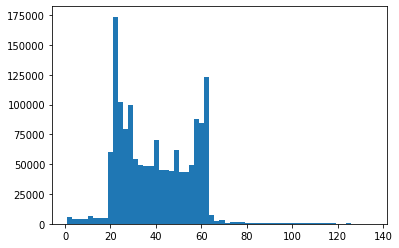

In [38]:
plt.hist( df['chipy'], bins=60 );

In [51]:
fig = plt.figure(frameon=False, figsize=(5,5))
ax = plt.Axes(fig, [0., 0., 1., (100/200)])
fig.add_axes(ax)

ax.hist2d( df['hits.pos_chip._0'], df['hits.pos_chip._1'], bins=(100, 200) );
el = Ellipse((xc, yc), a, b, 0)
ax.add_artist(el)

ValueError: Can not reset the axes.  You are probably trying to re-use an artist in more than one Axes which is not supported

In [ ]:
1+1

In [4]:
folder_root = '.'
rootfiles = [f for f in os.listdir(folder_root) if os.path.isfile(os.path.join(folder_root, f))]
rootfiles

['farichSimRes_e-mu-_3000MeV_0-90deg_30.0k_2020-02-07.root',
 'farichSimRes_pi-kaon-_1000MeV_0-90deg_50.0k_2020-02-11.root']

In [5]:
dp = DataPreprocessing()
dp.parse_root(*rootfiles)
#dp.parse_root(rootfiles[0])

In [6]:
#%%time 
H_all, h_all, mask_all = dp.generate_boards_randnum(board_size=100, N_circles=3, N_boards=10000)

0


/media/yana/discD/projects/farich-pics/farichlib/DataPreprocessing.py:124: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "add_to_board" failed type inference due to: non-precise type pyobject
[1] During: typing of argument at /media/yana/discD/projects/farich-pics/farichlib/DataPreprocessing.py (126)

File "../../farichlib/DataPreprocessing.py", line 126:
    def add_to_board(self, board, Y, arr, y):
        board_size = board.shape[0]
        ^

  @jit
/home/yana/anaconda3/lib/python3.7/site-packages/numba/object_mode_passes.py:178: NumbaWarning: Function "add_to_board" was compiled in object mode without forceobj=True.

File "../../farichlib/DataPreprocessing.py", line 125:
    @jit
    def add_to_board(self, board, Y, arr, y):
    ^

  state.func_ir.loc))
/home/yana/anaconda3/lib/python3.7/site-packages/numba/object_mode_passes.py:188: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compi

5000


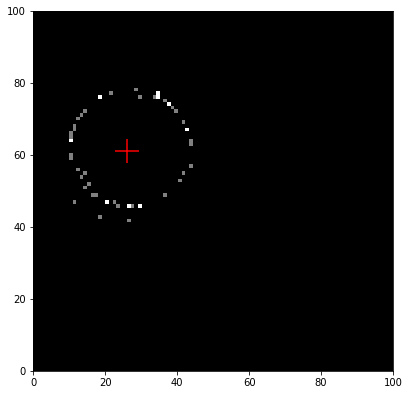

In [7]:
u=1
#u+=1
print_board(H_all[u], h_all[u])

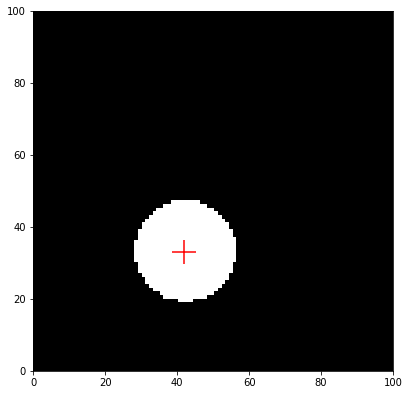

In [8]:
print_board(mask_all[5][0], h_all[5][0])

In [9]:
with open("../dataset/dataset_many_circles.pkl", "wb") as f:
    pickle.dump((H_all, h_all, mask_all), f)

In [ ]:
iou_score(mask_all[10][0], mask_all[0][0])

In [ ]:
iou_score(mask_all[0][0], mask_all[0][0])

In [ ]:
x_all = []
y_all = []
for i in range(len(h_all)):
    x_all.append(h_all[i][0][0])
    y_all.append(h_all[i][0][1])

In [ ]:
import matplotlib.pyplot as plt
plt.hist(x_all, bins=200);

In [ ]:
plt.hist(y_all, bins=200);

In [ ]:
import random

In [ ]:
x = [random.randint(20, 50) for _ in range(10000)]

In [ ]:
plt.hist(x, bins=60);

In [ ]:
x_all = []
y_all = []
for i in range(len(h_all[0])):
    x_all.append(h_all[0][i][0])
    y_all.append(h_all[0][i][1])

In [ ]:
plt.hist(x_all, bins=200);

In [ ]:
plt.hist(y_all, bins=200);